In [1]:
# Dependencies and Setup
# Pandas dependency
import pandas as pd

# Plotting dependencies
import matplotlib.pyplot as plt
import numpy as np

### Read clean data 

In [2]:
# Load clean data CSV file created in Part 1 into a Pandas DataFrame
df = pd.read_csv("../Resources/Diversity_in_tech_companies_clean_data.csv")

# Display sample data
df.head(10)

,Unnamed: 0,Year,Company,Female %,Male %,% White,% Asian,% Latino,% Black,% Multi,% Other,% Undeclared,Gender Total %,Diversity Total %
0,0,2018,Yahoo!,37.0,63.0,45.0,44.0,4.0,2.0,2.0,3.0,0.0,100.0,100.0
1,1,2018,Google,31.0,69.0,53.0,36.0,4.0,3.0,4.0,0.0,0.0,100.0,100.0
2,2,2018,Apple,32.0,68.0,54.0,21.0,13.0,9.0,3.0,1.0,2.0,100.0,103.0
3,3,2018,Cisco,24.0,76.0,53.0,37.0,5.0,4.0,1.0,0.0,0.0,100.0,100.0
4,4,2018,eBay,40.0,60.0,50.0,39.0,6.0,3.0,1.0,1.0,0.0,100.0,100.0
5,5,2018,HP,37.0,63.0,73.0,12.0,8.0,4.0,2.0,0.0,0.0,100.0,99.0
6,6,2018,Indiegogo,50.0,50.0,58.0,28.0,7.0,4.0,0.0,3.0,0.0,100.0,100.0
7,7,2018,Nvidia,17.0,83.0,37.0,45.0,3.0,1.0,14.0,0.0,0.0,100.0,100.0
8,8,2018,Dell,28.0,72.0,69.0,9.0,11.0,10.0,0.0,1.0,0.0,100.0,100.0
9,9,2018,Ingram Micro,31.0,69.0,52.0,14.0,19.0,14.0,1.0,0.0,0.0,100.0,100.0


In [3]:
# Examine data and datatypes
print(df.shape)
print(df.info())
print(df.describe())

(91, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         91 non-null     int64  
 1   Year               91 non-null     int64  
 2   Company            91 non-null     object 
 3   Female %           91 non-null     float64
 4   Male %             91 non-null     float64
 5   % White            91 non-null     float64
 6   % Asian            91 non-null     float64
 7   % Latino           91 non-null     float64
 8   % Black            91 non-null     float64
 9   % Multi            91 non-null     float64
 10  % Other            91 non-null     float64
 11  % Undeclared       91 non-null     float64
 12  Gender Total %     91 non-null     float64
 13  Diversity Total %  91 non-null     float64
dtypes: float64(11), int64(2), object(1)
memory usage: 10.1+ KB
None
       Unnamed: 0         Year   Female %     Male 

## Standarize colors on all charts

In [4]:
diversity_colors = {'% White':'#EC111A', 
          '% Asian':'#F2609E', 
          '% Black':'#FFD42F', 
          '% Latino':'#138468', 
          '% Multi':'#009DD6', 
          '% Other':'#FB6330', 
          '% Undeclared':'#7849B8'}
gender_colors = ['lightblue', 'pink']

## Question 2: What percentage of Males vs Females in the tech workplace?

In [5]:
df.groupby(["Company","Year"])
average_male = df.groupby('Year')['Male %'].mean()

average_male_df = pd.DataFrame(average_male).reset_index()

average_male_df

,Year,Male %
0,2014,65.937500
1,2015,64.882353
2,2016,64.722222
3,2017,65.000000
4,2018,62.863636


In [6]:
average_female = df.groupby('Year')['Female %'].mean()

average_female_df = pd.DataFrame(average_female).reset_index()

average_female_df

,Year,Female %
0,2014,34.000000
1,2015,35.058824
2,2016,35.222222
3,2017,35.000000
4,2018,37.181818


In [7]:
average_merge = pd.merge(average_male_df, average_female_df, on ='Year').round()
average_merge

,Year,Male %,Female %
0,2014,66.0,34.0
1,2015,65.0,35.0
2,2016,65.0,35.0
3,2017,65.0,35.0
4,2018,63.0,37.0


In [8]:
average_merge['Male %'].mean()

64.8

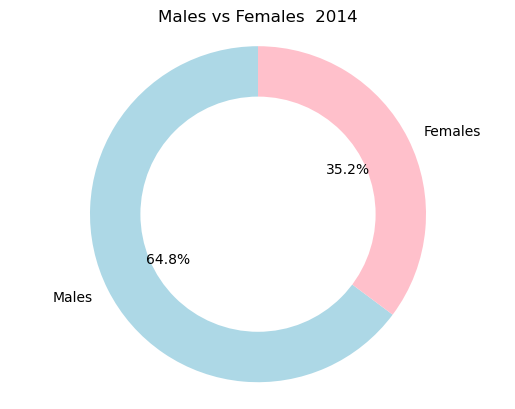

In [9]:
# Data for males and females
labels = ['Males', 'Females']
sizes = [average_merge['Male %'].mean(), average_merge['Female %'].mean()]  # percentages for males and females

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=gender_colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Males vs Females  2014')
plt.savefig("./images/MalesFemales2014.png")
plt.show()

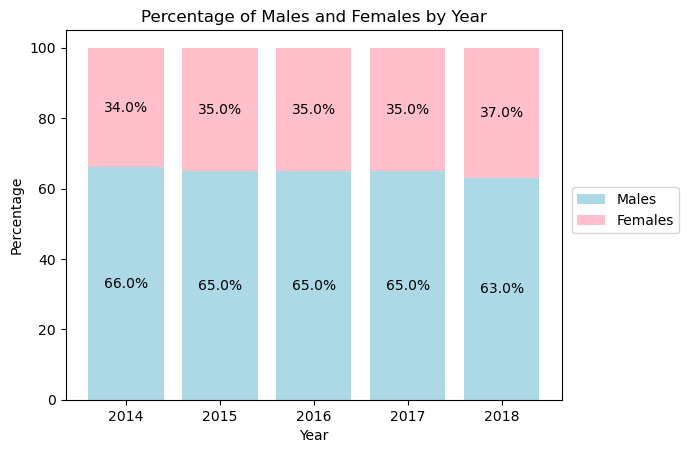

In [10]:
# Data for the years 2014 and 2015
years = average_merge['Year']
males_percent = average_merge['Male %']
females_percent = average_merge['Female %']

# Create a bar chart
plt.bar(years, males_percent, color=gender_colors[0], label='Males')
plt.bar(years, females_percent, color=gender_colors[1], bottom=males_percent, label='Females')

# Add labels for the percentages
for i, year in enumerate(years):
    plt.text(year, males_percent[i] / 2, f"{males_percent[i]}%", ha='center', va='center', color='black')
    plt.text(year, males_percent[i] + females_percent[i] / 2, f"{females_percent[i]}%", ha='center', va='center', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Percentage of Males and Females by Year')
plt.xticks(years)
plt.legend(loc = (1.02, 0.45))

# Show the plot
plt.savefig("./images/MalesFemalesStackedBarAllYears.png")
plt.show()

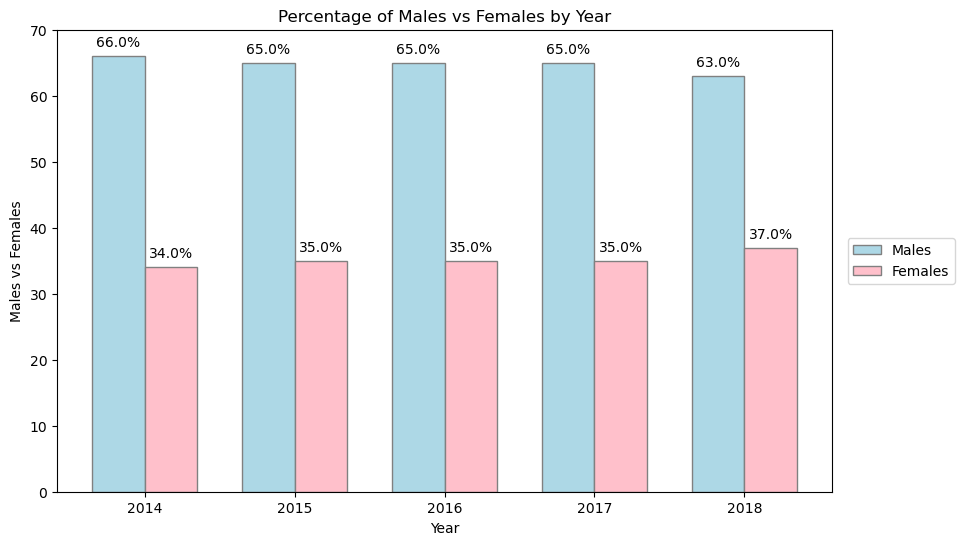

In [11]:
# Data for the years 2014 and 2015
years = average_merge['Year']
males_percent = average_merge['Male %']
females_percent = average_merge['Female %']

# Set the width of the bars
bar_width = 0.35
plt.figure(figsize=(10, 6))

# Set the position of the bars on the x-axis
r1 = np.arange(len(years))
r2 = [x + bar_width for x in r1]

# Create a bar chart with bars next to each other
plt.bar(r1, males_percent, color=gender_colors[0], width=bar_width, edgecolor='grey', label='Males')
plt.bar(r2, females_percent, color=gender_colors[1], width=bar_width, edgecolor='grey', label='Females')

# Add labels for the percentages
for i in range(len(years)):
    plt.text(r1[i], males_percent[i] + 1, f"{males_percent[i]}%", ha='center', va='bottom', color='black')
    plt.text(r2[i], females_percent[i] + 1, f"{females_percent[i]}%", ha='center', va='bottom', color='black')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Males vs Females')
plt.title('Percentage of Males vs Females by Year')
plt.xticks([r + bar_width/2 for r in range(len(years))], years)
plt.legend(loc = (1.02, 0.45))
plt.ylim(0, 70)


# Show the plot
plt.savefig("./images/MalesFemalesBarChartAllYears.png")
plt.show()

In [12]:
males_average = average_merge["Male %"].mean()
males_average

64.8

In [13]:
females_average = average_merge["Female %"].mean()
females_average

35.2

In [14]:
data = {
    "Male %": [males_average],
    "Female %": [females_average]
    }

total_df = pd.DataFrame(data).round()

total_df

,Male %,Female %
0,65.0,35.0


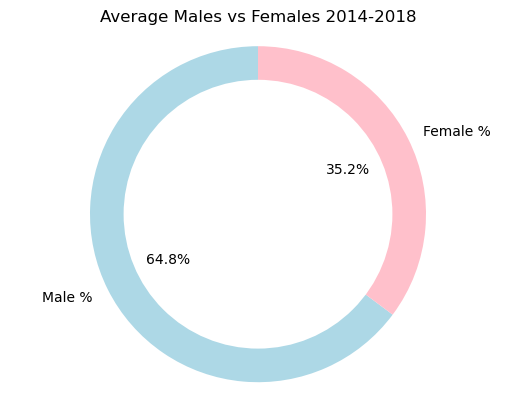

In [15]:
# Data for males and females
labels = ['Male %', 'Female %']
sizes = [males_average, females_average]  # percentages for males and females

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=gender_colors)

# Draw a white circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.80,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal')  

plt.title('Average Males vs Females 2014-2018')
plt.savefig("./images/MalesFemalesAllYears.png")
plt.show()

### Scatter plots

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


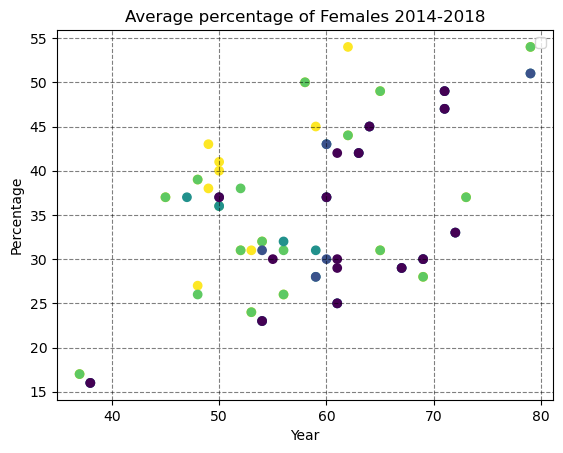

In [16]:
x = df['% White']
y = df['Female %']

plt.scatter(x, y, c = df['Year'])
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Average percentage of Females 2014-2018')
plt.grid(linestyle='--', alpha=0.5, color='black')
plt.legend()
plt.savefig("./images/scatterPlot1.png")
plt.show()

In [17]:
# Separate the years
df14 = df.loc[df['Year'] == 2014]
df15 = df.loc[df['Year'] == 2015]
df16 = df.loc[df['Year'] == 2016]
df17 = df.loc[df['Year'] == 2017]
df18 = df.loc[df['Year'] == 2018]

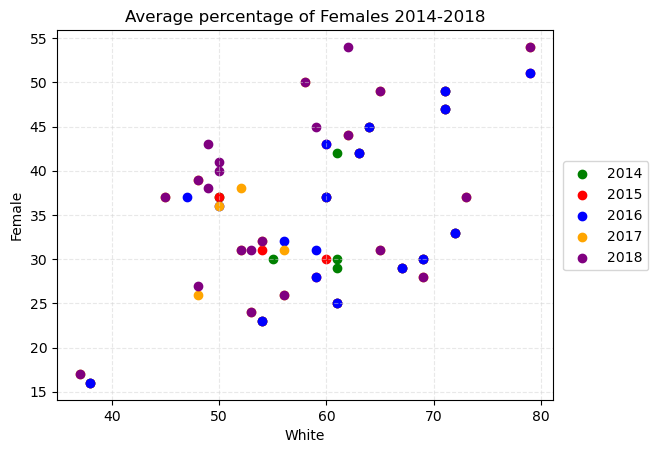

In [18]:
#plt.scatter(x, y, c = df15['Year'])
plt.scatter(df14['% White'], df14['Female %'], c = 'green')
plt.scatter(df15['% White'], df15['Female %'], c = 'red')
plt.scatter(df16['% White'], df16['Female %'], c = 'blue')
plt.scatter(df17['% White'], df17['Female %'], c = 'orange')
plt.scatter(df18['% White'], df18['Female %'], c = 'purple')
plt.xlabel('White')
plt.ylabel('Female')
plt.title('Average percentage of Females 2014-2018')
plt.grid(linestyle='--', alpha=0.5, color='lightgray')
plt.legend([2014, 2015, 2016, 2017, 2018], loc = (1.02, 0.35))
plt.savefig("./images/scatterPlot2.png")
plt.show()